In [1]:
print('hello')

hello


In [75]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [32]:
df  = pd.read_csv(r"C:\Users\MY LAPTOP\OneDrive\Desktop\july\Month5\playstore\googleplaystore.csv")

In [33]:
df.tail()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


In [36]:
# df['Price'] = df['Price'].astype(float)
df['Price'].unique()

array(['0', '4.99', '3.99', '6.99', '1.49', '2.99', '7.99', '5.99',
       '3.49', '1.99', '9.99', '7.49', '0.99', '9.00', '5.49', '10.00',
       '24.99', '11.99', '79.99', '16.99', '14.99', '1.00', '29.99',
       '12.99', '2.49', '10.99', '1.50', '19.99', '15.99', '33.99',
       '74.99', '39.99', '3.95', '4.49', '1.70', '8.99', '2.00', '3.88',
       '25.99', '399.99', '17.99', '400.00', '3.02', '1.76', '4.84',
       '4.77', '1.61', '2.50', '1.59', '6.49', '1.29', '5.00', '13.99',
       '299.99', '379.99', '37.99', '18.99', '389.99', '19.90', '8.49',
       '1.75', '14.00', '4.85', '46.99', '109.99', '154.99', '3.08',
       '2.59', '4.80', '1.96', '19.40', '3.90', '4.59', '15.46', '3.04',
       '4.29', '2.60', '3.28', '4.60', '28.99', '2.95', '2.90', '1.97',
       '200.00', '89.99', '2.56', '30.99', '3.61', '394.99', '1.26',
       'Everyone', '1.20', '1.04'], dtype=object)

In [61]:
df['Installs'] = df['Installs'].astype(str).str.replace('+', '', regex=False).str.replace(',', '', regex=False)
df['Price'] = df['Price'].astype(str).str.replace('$', '', regex=False)

df['Installs'] = pd.to_numeric(df['Installs'], errors='coerce')
df['Last Updated'] = pd.to_datetime(df['Last Updated'], errors='coerce')

In [51]:
df['Price'] = df['Price'].astype(float)
df['Installs'] = df['Installs'].astype(float)

In [62]:
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')
df['Installs'] = pd.to_numeric(df['Installs'], errors='coerce')

In [37]:
def clean(val):
    val = str(val)
    if 'M' in val:
        return float(val.replace('M', '')) * 1000000
    elif 'k' in val:
        return float(val.replace('k', '')) * 1000
    elif 'Varies with device' in val:
        return np.nan
    else:
        try:
            return float(val)
        except:
            return np.nan

In [38]:
df['Size'] = df['Size'].apply(clean)

In [39]:
df[['Installs', 'Size']]

,Installs,Size
0,10000.0,19000000.0
1,500000.0,14000000.0
2,5000000.0,8700000.0
3,50000000.0,25000000.0
4,100000.0,2800000.0
...,...,...
10836,5000.0,53000000.0
10837,100.0,3600000.0
10838,1000.0,9500000.0
10839,1000.0,NaN


In [40]:
df['Reviews'] = pd.to_numeric(df['Reviews'], errors='coerce')

In [41]:
df.sort_values(by='Reviews', ascending=False, inplace=True)

In [42]:
df.drop_duplicates(subset='App', keep='first', inplace=True)

In [43]:
df['Rating'] = df['Rating'].fillna(df['Rating'].median())

In [44]:
df.dropna(subset=['Type', 'Content Rating', 'Android Ver', 'Current Ver'], inplace=True)

In [45]:
df['Size'] = df['Size'].fillna(df.groupby('Category')['Size'].transform('mean'))

In [46]:
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [ ]:
df['Size_MB'] = df['Size'] / 1000000


df['Is_Game'] = df['Category'].astype(str).str.contains('GAME', case=False).astype(int)

df['Multi_Genre'] = df['Genres'].astype(str).str.contains(';').astype(int)


df['Revenue_Estimate'] = df['Price'] * df['Installs']

df['Is_Paid'] = (df['Type'] == 'Paid').astype(int)


def price_band(price):
    if price == 0: return 'Free'
    elif price < 1: return 'Cheap'
    elif price < 5: return 'Normal'
    elif price < 20: return 'Expensive'
    else: return 'Luxury'

df['Price_Band'] = df['Price'].apply(price_band)


df['Install_Tier'] = pd.cut(df['Installs'], bins=[-1, 1000, 100000, 1000000, 10000000, np.inf], labels=['Tiny', 'Small', 'Medium', 'Large', 'Viral'])



df['Engagement_Score'] = df['Reviews'] / df['Installs'].replace(0, 1)

df['Name_Length'] = df['App'].astype(str).apply(len)


df['Update_Year'] = df['Last Updated'].dt.year
df['Update_Month'] = df['Last Updated'].dt.month
df['Day_of_Week'] = df['Last Updated'].dt.day_name()


dataset_end_date = df['Last Updated'].max()
df['Days_Since_Update'] = (dataset_end_date - df['Last Updated']).dt.days



New columns added:
                                           App   Size_MB Price_Band  \
2544                                  Facebook  15.98409       Free   
381                         WhatsApp Messenger  11.30743       Free   
2604                                 Instagram  15.98409       Free   
382   Messenger – Text and Video Chat for Free  11.30743       Free   
1879                            Clash of Clans  98.00000       Free   

     Install_Tier  Engagement_Score  Days_Since_Update  
2544        Viral          0.078158                  5  
381         Viral          0.069119                  5  
2604        Viral          0.066577                  8  
382         Viral          0.056647                  7  
1879        Viral          0.448939                 24  


In [65]:
group = df.groupby(['Category', 'Type']).agg({
    'App': 'count',
    'Rating': 'mean',
    'Price': 'mean',
    'Installs': 'mean'
}).sort_values(by='App', ascending=False)

In [67]:
group.columns = ['App_Count', 'Avg_Rating', 'Avg_Price', 'Avg_Installs']

In [68]:
group.head()

,,App_Count,Avg_Rating,Avg_Price,Avg_Installs
Category,Type,,,,
FAMILY,Free,1689,4.187448,0.0,3.679918e+06
GAME,Free,863,4.235805,0.0,1.555843e+07
TOOLS,Free,750,4.061733,0.0,1.080073e+07
BUSINESS,Free,408,4.175000,0.0,1.708216e+06
LIFESTYLE,Free,350,4.124857,0.0,1.436127e+06


In [73]:
content_group = df.groupby(['Content Rating', 'Update_Year']).agg({
    'App' : 'count',
    'Rating': 'mean',
    'Installs': 'sum'
})

content_group.columns = ['App_Count', 'Avg_Rating', 'Total_Installs']

In [74]:
content_group.head()

App_Count  Avg_Rating  Total_Installs
Content Rating  Update_Year                                       
Adults only 18+ 2018                 3    4.300000       2000000.0
Everyone        2010                 1    4.200000        100000.0
                2011                13    3.953846       7407100.0
                2012                24    3.862500      13842210.0
                2013                92    4.081522      80003115.0

In [79]:
pivot = pd.pivot_table(df, values='Rating', index='Category', columns='Price_Band', aggfunc='mean')
pivot.tail()

Price_Band,Cheap,Expensive,Free,Luxury,Normal
Category,,,,,
SPORTS,4.533333,3.900000,4.230897,4.1,4.242105
TOOLS,4.280000,3.983333,4.061733,4.3,4.190909
TRAVEL_AND_LOCAL,NaN,4.066667,4.099517,NaN,4.200000
VIDEO_PLAYERS,3.100000,4.200000,4.067500,NaN,4.550000
WEATHER,NaN,4.150000,4.235211,NaN,4.433333


In [84]:
df.isnull().sum()

App                  0
Category             0
Rating               0
Reviews              0
Size                 0
Installs             0
Type                 0
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          0
Android Ver          0
Size_MB              0
Is_Game              0
Multi_Genre          0
Revenue_Estimate     0
Is_Paid              0
Price_Band           0
Install_Tier         0
Engagement_Score     0
Name_Length          0
Last_Updated         0
Update_Year          0
Update_Month         0
Day_of_Week          0
Days_Since_Update    0
dtype: int64

In [89]:
paid = df.query("Type == 'Paid'")
free = df.query("Type == 'Free'")

In [90]:
len(paid), len(free)

(751, 8897)

In [100]:
paid['Rating'].mean(), free['Rating'].mean()

(np.float64(4.269906790945406), np.float64(4.185950320332696))

In [105]:
df.eval('Good = (Rating > 4.5) & (Installs > 10000)', inplace=True)

In [107]:
eval = df.groupby('Type')['Good'].mean() * 100
eval

Type
Free    9.239069
Paid    7.589880
Name: Good, dtype: float64

In [ ]:
no = df.query("Price > 5 and Rating < 3.0")
no



,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,...,Install_Tier,Engagement_Score,Name_Length,Last_Updated,Update_Year,Update_Month,Day_of_Week,Days_Since_Update,Is_Gem,Good
2295,InfantRisk Center HCP,MEDICAL,2.6,41.0,14000000.0,1000.0,Paid,9.99,Everyone,Medical,...,Tiny,0.041,21,2015-05-06,2015,5,Wednesday,1190,False,False
5357,I am extremely Rich,LIFESTYLE,2.9,41.0,2900000.0,1000.0,Paid,379.99,Everyone,Lifestyle,...,Tiny,0.041,19,2018-07-01,2018,7,Sunday,38,False,False
6837,SkyTest BU/GU Lite,BUSINESS,2.9,28.0,20000000.0,500.0,Paid,17.99,Everyone,Business,...,Tiny,0.056,18,2017-10-24,2017,10,Tuesday,288,False,False


In [110]:
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

c:\Users\MY LAPTOP\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


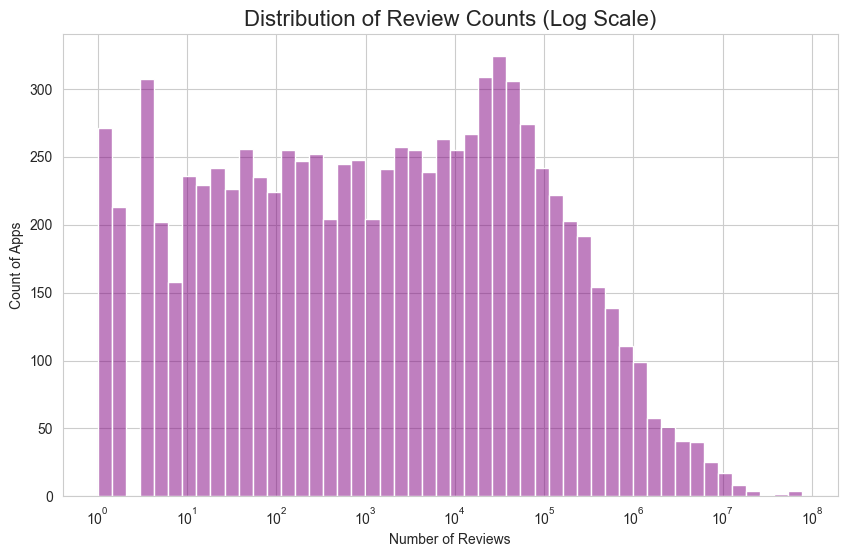

In [115]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Reviews'], bins=50, log_scale=True, color='purple', kde=True)

plt.title('Distribution of Review Counts (Log Scale)', fontsize=16)
plt.xlabel('Number of Reviews')
plt.ylabel('Count of Apps')
plt.show()

C:\Users\MY LAPTOP\AppData\Local\Temp\ipykernel_10864\2821925428.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=market_share.values, y=market_share.index, palette='magma')


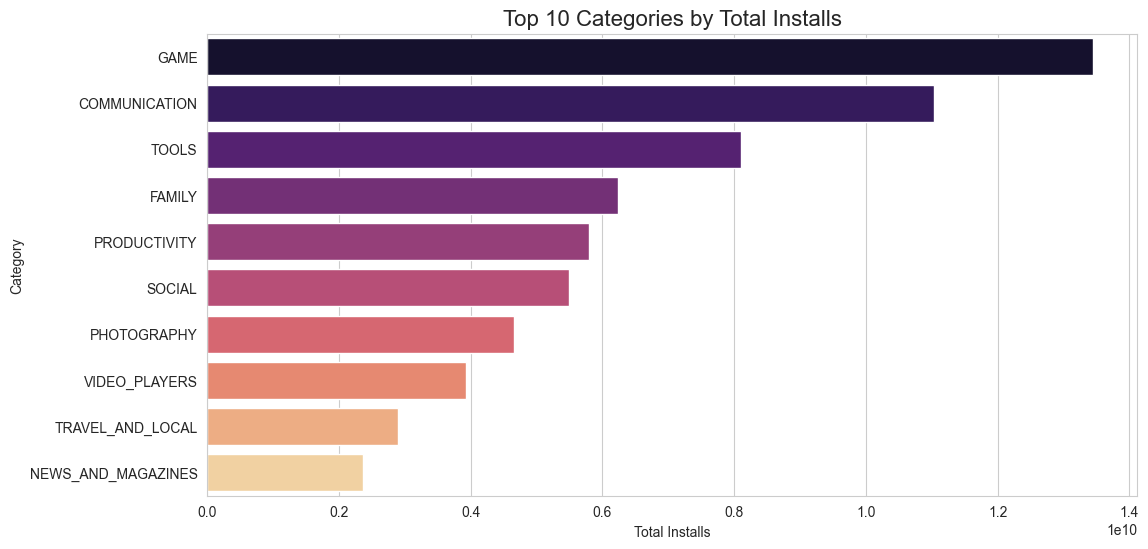

In [119]:
market_share = df.groupby('Category')['Installs'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=market_share.values, y=market_share.index, palette='magma')

plt.title('Top 10 Categories by Total Installs', fontsize=16)
plt.xlabel('Total Installs')
plt.show()

C:\Users\MY LAPTOP\AppData\Local\Temp\ipykernel_10864\109559167.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Reviews', y='App', data=top_apps, palette='coolwarm')


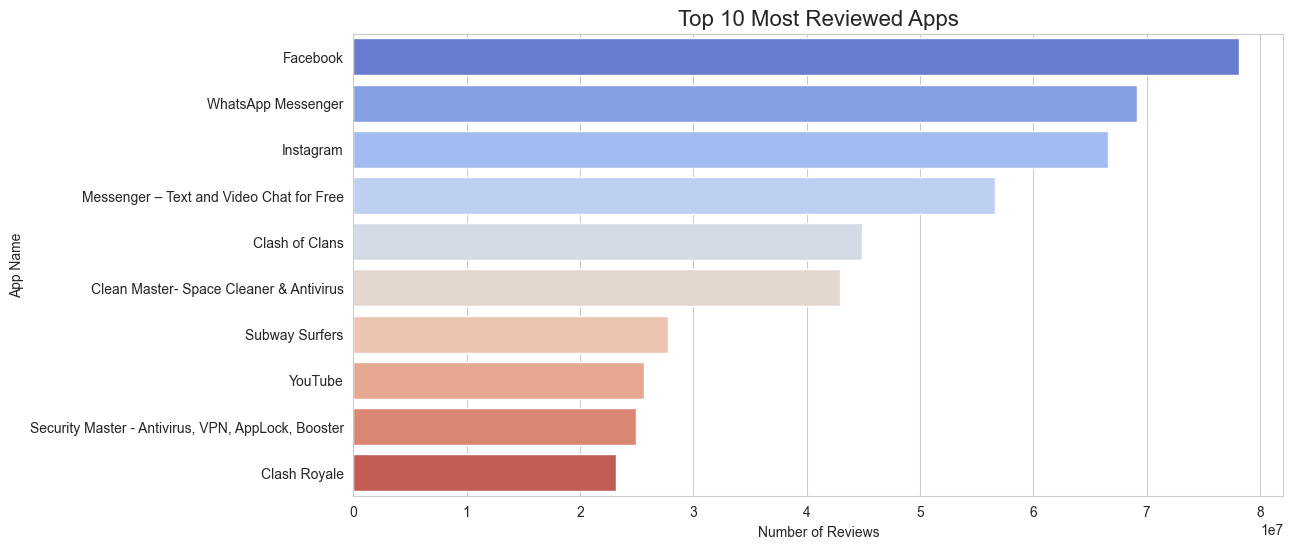

In [118]:
top_apps = df.nlargest(10, 'Reviews')[['App', 'Reviews', 'Rating', 'Category']]

plt.figure(figsize=(12, 6))
sns.barplot(x='Reviews', y='App', data=top_apps, palette='coolwarm')

plt.title('Top 10 Most Reviewed Apps', fontsize=16)
plt.xlabel('Number of Reviews')
plt.ylabel('App Name')
plt.show()